In [ ]:
!pip install gensim
!pip install spacy


In [ ]:
import gensim
from gensim import corpora
import spacy
from collections import Counter
import matplotlib.pyplot as plt


In [ ]:
import spacy
import pandas as pd

# Baca data dari file CSV menggunakan pandas
data = pd.read_csv("tripadvisor_hotel_reviews.csv")

# Contoh data teks (ganti dengan data Anda)
documents = data['Review']  # Ambil kolom Review dari dataset Anda

# Tokenisasi, penghilangan stop words, dan lemmatisasi
nlp = spacy.load("en_core_web_sm")
tokenized_documents = []

for doc in documents:
    doc = nlp(doc)
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    tokenized_documents.append(tokens)


In [ ]:
# Membangun dictionary
dictionary = corpora.Dictionary(tokenized_documents)

# Membangun corpus
corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

# Membangun model LDA dengan n topik (ganti n sesuai keinginan)
n_topics = 5  # Ubah sesuai jumlah topik yang Anda inginkan
lda_model = gensim.models.LdaModel(corpus, num_topics=n_topics, id2word=dictionary, passes=15)


In [ ]:
topics = lda_model.show_topics(num_topics=n_topics, num_words=5, log=False, formatted=False)

for topic, words in topics:
    print(f"Topik {topic + 1}:")
    for word, score in words:
        print(f"{word}: {score}")
    print("\n")


Topik 1:
camper: 0.004805333912372589
mario: 0.004295027814805508
tegal: 0.002682925434783101
sari: 0.002566506387665868
freind: 0.0016269752522930503


Topik 2:
,: 0.09680959582328796
great: 0.022563256323337555
stay: 0.021715868264436722
hotel: 0.021013299003243446
staff: 0.018292170017957687


Topik 3:
_: 0.13592204451560974
didn__Ç_é: 0.020061185583472252
don__ç_é: 0.010679705999791622
wasn__Ç_é: 0.009581420570611954
it__ç_é: 0.0087112532928586


Topik 4:
,: 0.09851474314928055
hotel: 0.037954311817884445
room: 0.029065191745758057
stay: 0.015679936856031418
 : 0.011261272244155407


Topik 5:
,: 0.1132250502705574
room: 0.012807677499949932
beach: 0.010452192276716232
resort: 0.009519249200820923
good: 0.009461908601224422




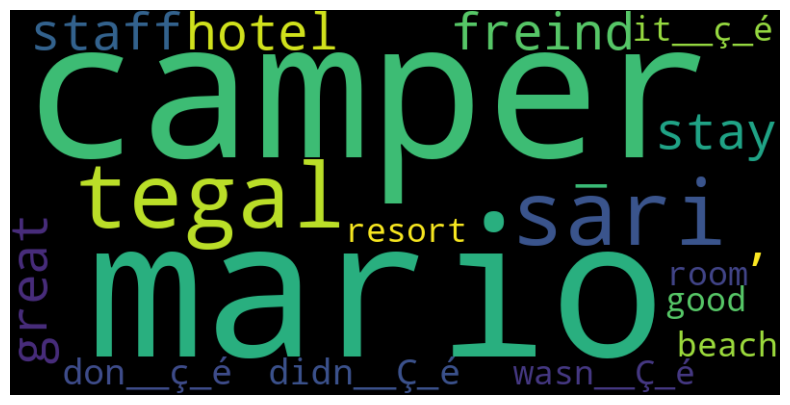

In [ ]:
from wordcloud import WordCloud

# Memasukkan kata-kata utama ke dalam dictionary
word_cloud_data = {}
for topic, words in topics:
    for word, _ in words:
        word_cloud_data[word] = 1  # Nilai 1 bisa diubah sesuai keinginan

# Membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color="black").generate_from_frequencies(word_cloud_data)

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
